In [1]:
#BacDivePy
from  bacdive.DSMZClient import DSMZ_login
from  bacdive.DSMZClient import retrieve

#utils
import pandas as pd
import numpy as np

#plot style
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#test style
from IPython.core.display import HTML
HTML("""<style>div.cell { /* Tunes the space between cells */margin-top:1em;margin-bottom:1em;}div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 3em;line-height:1.4em;text-align:center;}
div.text_cell_render h2 { /*  Parts names nearer from text */margin-bottom: -0.4em;}
div.text_cell_render { /* Customize text cells */font-family: 'Times New Roman';font-size:1.2em;line-height:1.4em;
padding-left:3em;padding-right:3em;}</style>""")
%matplotlib inline


This python package is an interface for the [Bacterial
Diversity Metadatabase][BD] ([Söhngen et al. 2014 & 2016
](#references)) of the [DSMZ (German Collection of Microorganisms and Cell Cultures)][DMSZ].

[BD]: https://bacdive.dsmz.de/
[DMSZ]: https://www.dsmz.de/about-us.html


### Set Login

To login you must be [registered][reg] for the BacDive API. Once you have your login credentials you may use them below. 


[reg]: https://bacdive.dsmz.de/api/bacdive/registration/register/

In [ ]:
DSMZ_login('username@email.com')

## There are four methods to search the BacDive Database

### Species Level Search

In [3]:
species_search_data=retrieve(['Bacillus halodurans','Aneurinibacillus thermoaerophilus'],search_type='species')

Retrieving information on: Bacillus halodurans


100%|██████████| 18/18 [00:15<00:00,  1.14it/s]


Retrieving information on: Aneurinibacillus thermoaerophilus


100%|██████████| 15/15 [00:13<00:00,  1.12it/s]


### Genus Level Search

In [4]:
genus_search_data=retrieve(['Acaricomes','Thermus'],search_type='genus')

Retrieving information on: Acaricomes


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


Retrieving information on: Thermus


100%|██████████| 32/32 [00:29<00:00,  1.08it/s]


### DSMZ Culture Number Search

In [5]:
DSMZnum_search_data=retrieve(['DSM 1','DSM 2'],search_type='bacdive id')

Retrieving information on: DSM 1


100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Retrieving information on: DSM 2


100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


### Sequence Accession Number Search

In [6]:
Acc_search_data=retrieve(['KT935587','ALAS01000001'],search_type='sequence accession number')

Retrieving information on: KT935587


100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


Retrieving information on: ALAS01000001


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


## Data format

All searches output a multilevel indexed pandas dataframe with the DSMZ culture IDs associated with the search in the columns. The levels of the index are the:

Sections ( there are 8 sections ) 
- application_interaction
- culture_growth_condition
- environment_sampling_isolation_source
- molecular_biology
- morphology_physiology
- references
- strain_availability
- taxonomy_name

Within those subsection there are several subsections and within those subsections there are various fields. 

To view the subsections:
- set(df.index.get_level_values('Subsection'))

To view the Fields:
- set(df.index.get_level_values('Field'))

If a certain field needs to be indexed it can be done by calling:

- df.loc([Section_value,Subsection_value,Field_value])


Aa an example of how to use this data we can view culture temps at the genus level from what we ran above.

In [7]:
# retrieved from above
genus_search_data.head()

DSMZ_7517  \
Section                 Subsection      Field                                                           
application_interaction risk_assessment ID_reference                                           [5270]   
                                        biosafety_level                                           [1]   
                                        biosafety_level_comment  [Risk group (German classification)]   
                                        pathogenicity_animal                                   [True]   
                                        pathogenicity_human                                       NaN   

                                                                                           DSMZ_16719  \
Section                 Subsection      Field                                                           
application_interaction risk_assessment ID_reference                                           [2956]   
                                        biosafety_level                                           [1]   
                                        biosafety_level_comment  [Risk group (German classification)]   
                                        pathogenicity_animal                                      NaN   
                                        pathogenicity_human                                       NaN   

                                                                DSMZ_16715  \
Section                 Subsection      Field                                
application_interaction risk_assessment ID_reference                   NaN   
                                        biosafety_level                NaN   
                                        biosafety_level_comment        NaN   
                                        pathogenicity_animal           NaN   
                                        pathogenicity_human            NaN   

                                                                                          DSMZ_132856  \
Section                 Subsection      Field                                                           
application_interaction risk_assessment ID_reference                                          [24644]   
                                        biosafety_level                                           [1]   
                                        biosafety_level_comment  [Risk group (German classification)]   
                                        pathogenicity_animal                                      NaN   
                                        pathogenicity_human                                       NaN   

                                                                                           DSMZ_16722  \
Section                 Subsection      Field                                                           
application_interaction risk_assessment ID_reference                                          [12529]   
                                        biosafety_level                                           [1]   
                                        biosafety_level_comment  [Risk group (German classification)]   
                                        pathogenicity_animal                                      NaN   
                                        pathogenicity_human                                       NaN   

                                                                                           DSMZ_16718  \
Section                 Subsection      Field                                                           
application_interaction risk_assessment ID_reference                                            [355]   
                                        biosafety_level                                           [1]   
                                        biosafety_level_comment  [Risk group (German classification)]   
                                        pathogenicity_animal                

In [8]:
#first we need to retrieve the data through indexing
genus={x:y_ for x,y in genus_search_data.loc['taxonomy_name','strains','genus'].items() for y_ in y}
culture_temp=genus_search_data.loc['culture_growth_condition','culture_temp','temp'].dropna()

all_temps=pd.DataFrame([[temp,genus[DSMZ_no]] for temps,DSMZ_no in zip(culture_temp.values,culture_temp.index) 
           for temp in temps],columns=['Culture Temp','Genus'])

all_temps.head()

,Culture Temp,Genus
0,15,Acaricomes
1,16,Acaricomes
2,17,Acaricomes
3,18,Acaricomes
4,19,Acaricomes


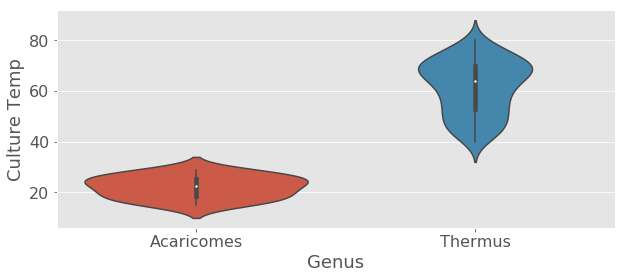

In [9]:
plt.rcParams["axes.titlesize"] = 40
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

#now we can plot the data
fig,ax=plt.subplots(1,1,figsize=(10,4))
sns.violinplot(y='Culture Temp',x='Genus',data=all_temps,ax=ax)
plt.show()